In [1]:
from IPython.display import display, Image, HTML

from nico_info import NicovideoInfomation
from utils import analyze_comments

In [2]:
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

### 動画 URL 入力
そのまま入力

In [ ]:
video_url = input()

ランキングから入力

In [3]:
import requests
from bs4 import BeautifulSoup
import ipywidgets as widgets

In [4]:
genres_dict = {
    '全ジャンル': 'all',
    '話題': 'hot-topic',
    'エンターテインメント': 'entertainment',
    'ラジオ': 'radio',
    '音楽・サウンド': 'music_sound',
    'ダンス': 'dance',
    '動物': 'animal',
    '自然': 'nature',
    '料理': 'cooking',
    '旅行・アウトドア': 'traveling_outdoor',
    '乗り物': 'vehicle',
    'スポーツ': 'sports',
    '社会・政治・時事': 'society_politics_news',
    '技術・工作': 'technology_craft',
    '解説・講座': 'commentary_lecture',
    'アニメ': 'anime',
    'ゲーム': 'game',
    'その他': 'other',
    'R-18': 'r18'
}
terms_dict = {
    '毎時': 'hour',
    '24時間': '24h',
    '週間': 'week',
    '月間': 'month',
    '全期間': 'total'
}

genres_select = widgets.Select(options=list(genres_dict.keys()))
terms_select = widgets.Select(options=list(terms_dict.keys()))

display(genres_select, terms_select)

Select(options=('全ジャンル', '話題', 'エンターテインメント', 'ラジオ', '音楽・サウンド', 'ダンス', '動物', '自然', '料理', '旅行・アウトドア', '乗り物', 'スポ…

Select(options=('毎時', '24時間', '週間', '月間', '全期間'), value='毎時')

In [5]:
print(f'{genres_select.value}: {terms_select.value}\n')
ranking_url = 'https://www.nicovideo.jp/ranking/genre/{}?term={}'
ranking_url = ranking_url.format(
    genres_dict[genres_select.value], terms_dict[terms_select.value]
)

source = requests.get(ranking_url)
soup = BeautifulSoup(source.text, 'html.parser')

card = '''
    <div style='display: flex; height: 75px;'>
      <div style='width: 30px; height: 70px; margin: 20px 0px 0px 0px; padding: 0px 5px 0px 5px;'>{:03d}</div>
      <div style='width: 120px; height: 70px; padding: 0px 5px 0px 0px;'><img src={} width=120px/></div>
      <div style='width: 600px; height: 70px; position:relative;'>
        <div style='top: 0;'>{}</div>
        <div style='position: absolute; bottom: 0;'>▶️{} 💬{} 🤍{} 📁{}</div>
      </div>
    </div>
'''

urls, cards = [], []
for i, elem in enumerate(soup.find_all('div', class_='NC-VideoMediaObject')):
    title = elem.h2.text.lstrip()
    urls.append(elem.a.attrs['href'])
    thumbnail = elem.find('div', class_='NC-Thumbnail-image').attrs['data-background-image']
    view, comment, like, mylist, unknown = [counter.text for counter in elem.find_all('div', 'NC-VideoMetaCount')]
    cards.append(card.format(i+1, thumbnail, title, view, comment, like, mylist))

display(HTML(''.join(cards)))

全ジャンル: 毎時



In [6]:
idx = -1
while not (-1 < idx < len(urls)):
    idx = int(input('index:'))-1

video_url = urls[idx]
display(HTML(cards[idx]))
print(video_url)

index: 1


https://www.nicovideo.jp/watch/so40377323


---
CLASS `NicovideoInfomation(video_url: str = None, video_id: str = None)`

Parameters
- `video_url(str)` - 動画のURL
- `video_id(str)` - 動画のID
> どちらかだけでOK

`load_comments(forks, mode, hop_rate, check, **tqdm_kwargs)`

Parameters
- `forks(Union[int, list])` - コメントのタイプ (0: 一般，1: 投稿者，2: かんたん)
- `mode(str)` - 読み込み方 (once: 最新のみ，roughly: 粗めに，exactly: 正確に)
- `hop_rate(float)` - 過去コメントを読み込むためのパラメータ(粗め: 0~1 :正確)
- `check` - コメントをどれだけ読み込めたか表示する

`video_html(w, h)`

Parameters
- `h(int)` - 高さ
- `w(int)` - 幅

Returns
- `html(str)` - 動画埋め込み用の HTML

---

In [7]:
ninfo = NicovideoInfomation(video_url)
ninfo.load_comments([0, 2], hop_rate=.2, mode='exactly', check=True)
display(HTML(ninfo.video_html()))

comments_df = ninfo.comments_df

  0%|          | 0/7166 [00:00<?, ?it/s]

0-Loading exactly:   0%|          | 0/6 [00:00<?, ?it/s]

=== total comments ===
user number: 613
comment number: 4515
comment / user: 7.37
------
acquisition rate: 98.41%

=== comments: 0 ===
user number: 589
comment number: 4174
comment / user: 7.09
------
acquisition rate: 98.28%

=== comments: 2 ===
user number: 53
comment number: 341
comment / user: 6.43
------
acquisition rate: 100.00%


### コメントのプロット

In [8]:
remove_index = ['user_id', '184', 'position', 'size', 'color', 'command', 'score']
for fork in sorted(set(comments_df.index.str[0])):
    fork_df = comments_df[comments_df.index.str[0] == fork]
    display(fork_df.drop(remove_index, axis=1))

,comment,write_time,video_time
comment_id,,,
0-1,きたー,1.651201e+09,10.11
0-2,うぽつ,1.651201e+09,9.66
0-3,時は来た,1.651201e+09,8.25
0-4,さいまえ,1.651201e+09,8.53
0-6,待ちかねまぞく,1.651201e+09,0.66
...,...,...,...
0-4243,‌\n\n\...,1.651208e+09,1375.77
0-4244,キメ店だろ？,1.651208e+09,496.49
0-4245,誘導弾もあるっていうヤバさ,1.651208e+09,930.31


,comment,write_time,video_time
comment_id,,,
2-1,うぽつ,1.651201e+09,1.16
2-2,うぽつ,1.651201e+09,1.61
2-3,うぽつ,1.651201e+09,5.96
2-4,かわいい,1.651201e+09,17.63
2-5,うぽつ,1.651201e+09,4.81
...,...,...,...
2-337,かわいい,1.651208e+09,720.78
2-338,かわいい,1.651208e+09,722.30
2-339,かわいい,1.651208e+09,724.72


### コメントの保存

In [ ]:
vid = ninfo.video_id
fn = f'{vid}_comments'

# # csv
# comments_df.to_csv(f'tmp/{fn}.csv')
# # gzip で圧縮
# comments_df.to_csv(f'tmp/{fn}.csv.gz', compression='gzip')

# # pickle
# comments_df.to_pickle(f'tmp/{fn}.pkl')
# # gzip で圧縮
# comments_df.to_pickle(f'tmp/{fn}.pkl.gz', compression='gzip')

### WordCloud によるコメント解析

In [9]:
from wordcloud import WordCloud

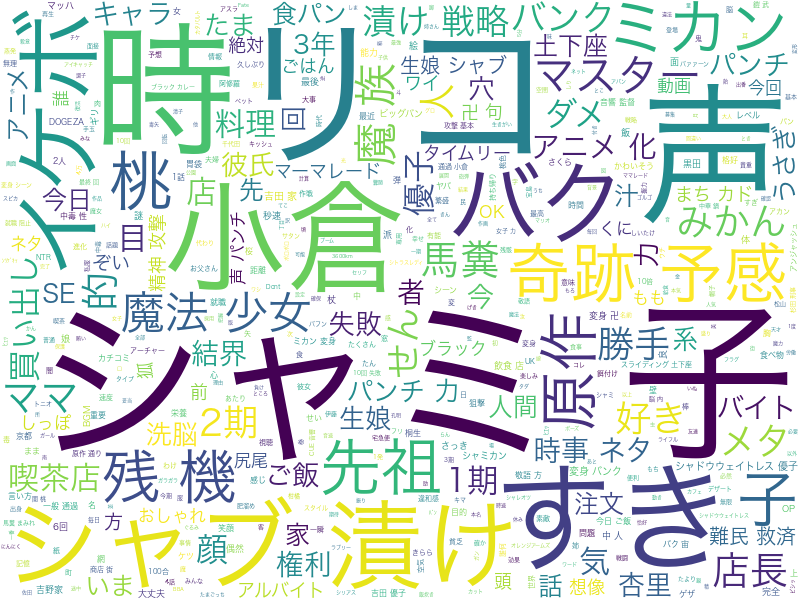

In [10]:
tgt_df = comments_df[comments_df.index.str[0] == '0']

tgt_comments = tgt_df.comment

# tokenizer には janome か sudachi が選択できる
results = analyze_comments(tgt_comments, tokenizer='janome')
text = ' '.join(results)

font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'
wordcloud = WordCloud(
    background_color='white',
    font_path=font_path,
    width=800,
    height=600,
    max_words=500
).generate(text)

wordcloud.to_file('./wordcloud.png')
display(Image('./wordcloud.png'))

### コメント検索

In [11]:
search_word = input()
display(comments_df[comments_df.comment.str.contains(search_word)])

 悪い


,comment,user_id,write_time,video_time,184,position,size,color,command,score
comment_id,,,,,,,,,,
0-341,シャミ子が悪いんだよ,ntKY0rJn5c2VcbqfV79t6DtabkU,1.651202e+09,9.08,1,naka,medium,white,NaN,0
0-697,これは完全にシャミ子が悪いんだよ,s9UcmfYdxXIfuvP2iJ4UWxumfyY,1.651202e+09,609.15,1,naka,medium,white,,0
0-710,シャミ子が悪いんだよ,cODT4h7WO64vp7hTgo5UbtvtWeY,1.651202e+09,613.14,1,naka,medium,white,,-60
0-1248,これはシャミ子が悪い,YkxBIgi0FGOZ1wWCp3uMFpVlu4o,1.651203e+09,392.02,1,naka,medium,white,,0
0-2017,ちょっと調子悪いんちゃう？,rQk7tgvbgr-Wk_Yoz648O4kKbys,1.651204e+09,1073.02,1,naka,medium,white,NaN,0
0-2292,オビワンが悪い！,1c-rucWo4kmFHX7C_xLy3hVklkk,1.651204e+09,157.34,1,naka,medium,white,,-120
0-2301,これはシャミ子が悪い,ee17ys0go0Yv41d25PIKf_IACxo,1.651204e+09,616.50,1,naka,medium,white,,0
0-2869,サム子が悪いんだよ,-eldFNUbBNMNa1Zox7jlMBZ3hMA,1.651205e+09,1.51,1,naka,medium,white,NaN,0
0-3221,これはシャミ子が悪い,ftFpdF1Wduqt6fvOS98T2iFyHbo,1.651206e+09,620.34,1,naka,medium,white,NaN,0


### ユーザー毎の投稿頻度

In [13]:
import matplotlib.pyplot as plt
from pprint import pprint

max: 136
min: 1
avg: 7.09
---
many post users:
{'4eys2pEanW0acvkwvzGk__3kjzE': 86,
 'K-BzxBch1VHtEAfXTXp0f4GuApI': 75,
 'KxRMkXo6L8MNhQinNUmXiTzQ8uw': 136,
 'MluT7sSqBYqrskIiF1PY4FTfyYE': 60,
 'U8ePMLzS1yjrsMWy2OhRNAcFZko': 96}


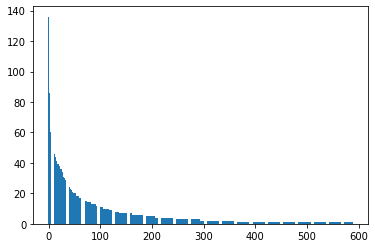

In [14]:
tgt_df = comments_df[comments_df.index.str[0] == '0']

uids = set(tgt_df.user_id)
hists = [(uid, len(tgt_df[tgt_df.user_id == uid])) for uid in uids]
hists.sort(key=lambda x: x[1], reverse=True)

left = range(len(hists))
height = [t[1] for t in hists]

print(f'max: {max(height)}')
print(f'min: {min(height)}')
print(f'avg: {sum(height)/len(height):.2f}')
print('---')
print('many post users:')
pprint({t[0]: t[1] for t in hists[:5]})

plt.bar(left, height)
plt.show()

### スコアの低いユーザーの投稿

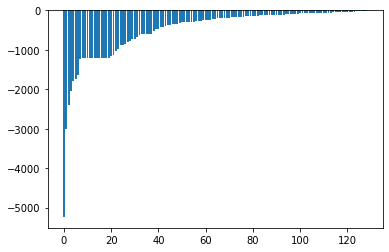

Ll1PwYkY4DyvBJoo4BXvQBU7pLM : -5248.56
IhYDGtkFGPSqQinWGtyIRwKE3vA : -3000.00
ES0Q6AI0vD-DxlCzdLkn8YYNNEg : -2400.00
Y5mskYkeht3VWcw2Knm9KjUl38w : -2035.53
dcznIx1g6AzKJIbKbnehOIvEd2s : -1800.00


In [15]:
tgt_df = comments_df[comments_df.index.str[0] == '0']
uids = set(tgt_df.user_id)
scores = [
    (uid, tgt_df[tgt_df.user_id == uid].score.values.mean())
    for uid in uids
]
scores = [t for t in scores if t[1] != 0.]
scores.sort(key=lambda x: x[1])

left = range(len(scores))
height = [t[1] for t in scores]

plt.bar(left, height)
plt.show()

remove_index = ['user_id', 'write_time', 'video_time', 'command', '184']
for score in scores[:5]:
    print(score[0], f': {score[1]:.2f}')
    # display(tgt_df[tgt_df.user_id == score[0]].drop(remove_index, axis=1))